<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Classification with Python</font></h1>


In this notebook we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Let's first load required libraries:


In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


In [4]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


Let's download the dataset


In [5]:
# !wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

### Load Data From CSV File


In [7]:
# df = pd.read_csv('loan_train.csv')
# df.head()

In [8]:
df.shape

(346, 10)

### Convert to date time object


In [9]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing


Let’s see how many of each class is in our data set


In [6]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection


Let's plot some columns to underestand data better:


In [7]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: done

# All requested packages already installed.



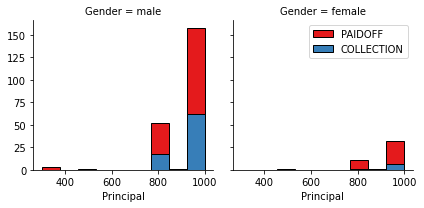

In [8]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

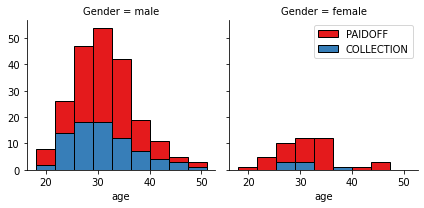

In [9]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Let's look at the day of the week people get the loan


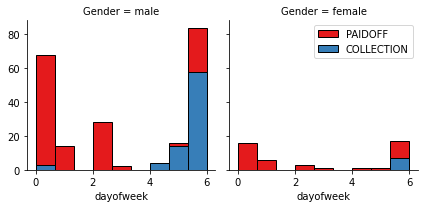

In [10]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4


In [11]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values


Let's look at gender:


In [12]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Let's convert male to 0 and female to 1:


In [13]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding

#### How about education?


In [14]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Features before One Hot Encoding


In [15]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame


In [16]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature Selection


Let's define feature sets, X:


In [17]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?


In [18]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [19]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split)


In [20]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

\__ Notice:\__

*   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
*   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
*   You should include the code of the algorithm in the following cells.


In [21]:
from sklearn.metrics import confusion_matrix, classification_report
def classification_validation(model, X_train, y_train, X_test, y_test):

    """ to get the metrics for the model """

    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("\n"*3, "-*"*30)
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

# K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.\
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y ,test_size=0.2, random_state=42)

print("Train set: ", X_train.shape, y_train.shape)
print("Test set: ", X_test.shape, y_test.shape)

Train set:  (276, 8) (276,)
Test set:  (70, 8) (70,)


In [23]:
from sklearn.neighbors import KNeighborsClassifier
kNN_model = KNeighborsClassifier().fit(X_train, y_train)
classification_validation(kNN_model, X_train, y_train, X_test, y_test)


Test_Set
[[ 4 13]
 [ 9 44]]
              precision    recall  f1-score   support

  COLLECTION       0.31      0.24      0.27        17
     PAIDOFF       0.77      0.83      0.80        53

    accuracy                           0.69        70
   macro avg       0.54      0.53      0.53        70
weighted avg       0.66      0.69      0.67        70




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Train_Set
[[ 40  29]
 [ 16 191]]
              precision    recall  f1-score   support

  COLLECTION       0.71      0.58      0.64        69
     PAIDOFF       0.87      0.92      0.89       207

    accuracy                           0.84       276
   macro avg       0.79      0.75      0.77       276
weighted avg       0.83      0.84      0.83       276



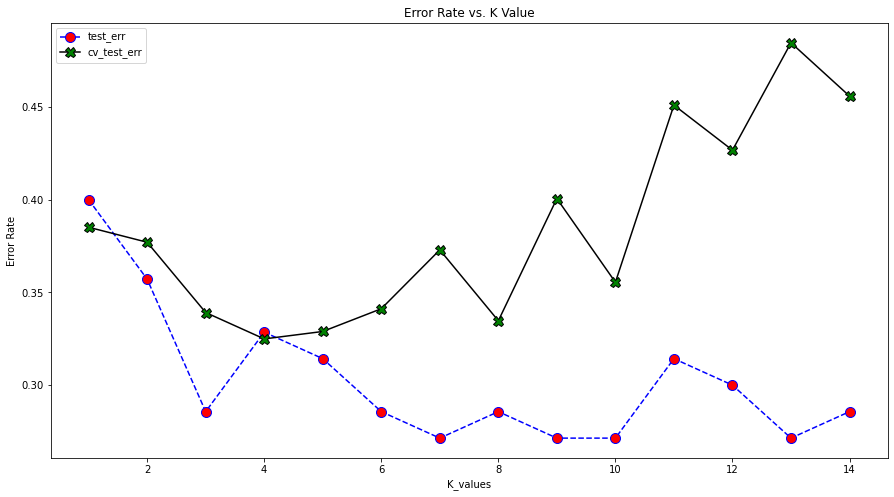

In [24]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.model_selection import cross_val_score,cross_validate

test_error_rates_cv = []

for k in range(1,15):
    model = KNeighborsClassifier(n_neighbors = k)
    scores = cross_validate(model, X_train, y_train, scoring = ['f1_macro'], cv = 10, error_score="raise")
    accuracy_mean = scores["test_f1_macro"].mean() 
    
    test_error = 1 - accuracy_mean 
    test_error_rates_cv.append(test_error)

test_error_rates = []
for k in range(1,15):
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train,y_train) 
    y_pred_test = model.predict(X_test)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)


plt.figure(figsize=(15,8))
plt.plot(range(1,15), test_error_rates, color='blue', linestyle='--', marker='o', markerfacecolor='red', markersize=10)
plt.plot(range(1,15), test_error_rates_cv, color='black', linestyle='-', marker='X', markerfacecolor='green', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.legend(["test_err", "cv_test_err"])

In [25]:
from sklearn.model_selection import cross_val_score,cross_validate

kNN_model = KNeighborsClassifier(n_neighbors=8).fit(X_train, y_train)
classification_validation(kNN_model, X_train, y_train, X_test, y_test)

Test_Set
[[ 5 12]
 [ 8 45]]
              precision    recall  f1-score   support

  COLLECTION       0.38      0.29      0.33        17
     PAIDOFF       0.79      0.85      0.82        53

    accuracy                           0.71        70
   macro avg       0.59      0.57      0.58        70
weighted avg       0.69      0.71      0.70        70




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Train_Set
[[ 43  26]
 [ 23 184]]
              precision    recall  f1-score   support

  COLLECTION       0.65      0.62      0.64        69
     PAIDOFF       0.88      0.89      0.88       207

    accuracy                           0.82       276
   macro avg       0.76      0.76      0.76       276
weighted avg       0.82      0.82      0.82       276



In [26]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

y_pred_train = kNN_model.predict(X_train)
y_pred = kNN_model.predict(X_test)
# jaccard_similarity_score(y_train, y_pred_train)

f1_KNN_train = f1_score(y_train,y_pred_train, average='macro')
f1_KNN_test = f1_score(y_test,y_pred, average='macro')

jaccard_KNN_train = jaccard_score(y_train,y_pred_train, average='macro')
jaccard_KNN_test = jaccard_score(y_test,y_pred, average='macro')

print(f"f1 macro score for test with KNN is : {f1_KNN_test}")
print(f"jaccard macro score for test with KNN is : {jaccard_KNN_test}")
print("---"*20)
print(f"f1 macro score for train with KNN is : {f1_KNN_train}")
print(f"jaccard macro score for train with KNN is : {jaccard_KNN_train}")

f1 macro score for test with KNN is : 0.5757575757575758
jaccard macro score for test with KNN is : 0.4461538461538461
------------------------------------------------------------
f1 macro score for train with KNN is : 0.7597655209166001
jaccard macro score for train with KNN is : 0.6285454375816384


# Decision Tree


In [27]:
from sklearn.tree import DecisionTreeClassifier


model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)
classification_validation(model_dt, X_train, y_train, X_test, y_test)

Test_Set
[[ 5 12]
 [13 40]]
              precision    recall  f1-score   support

  COLLECTION       0.28      0.29      0.29        17
     PAIDOFF       0.77      0.75      0.76        53

    accuracy                           0.64        70
   macro avg       0.52      0.52      0.52        70
weighted avg       0.65      0.64      0.65        70




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Train_Set
[[ 65   4]
 [ 19 188]]
              precision    recall  f1-score   support

  COLLECTION       0.77      0.94      0.85        69
     PAIDOFF       0.98      0.91      0.94       207

    accuracy                           0.92       276
   macro avg       0.88      0.93      0.90       276
weighted avg       0.93      0.92      0.92       276



In [28]:
path = model_dt.cost_complexity_pruning_path(X_train,y_train)
path = path.ccp_alphas

accuracy_cv =[]
for alpha in path:
    scores = cross_validate(DecisionTreeClassifier(ccp_alpha=alpha), X_train, y_train, scoring = ['f1_macro'], cv = 5)
    accuracy_cv.append(scores["test_f1_macro"].mean())
  
df_result = pd.DataFrame(list(path), columns=['alpha'])
df_result['f1_CV']=accuracy_cv
df_result
best_alpha = df_result.iloc[np.argmax(df_result["f1_CV"]),:]["alpha"]
print("Best alpha and score is : ",df_result.iloc[np.argmax(df_result["f1_CV"]),:])
print("---"*20)

model_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
model_dt.fit(X_train, y_train)

classification_validation(model_dt, X_train, y_train, X_test, y_test)

Best alpha and score is :  alpha    0.001840
f1_CV    0.638041
Name: 20, dtype: float64
------------------------------------------------------------
Test_Set
[[ 5 12]
 [11 42]]
              precision    recall  f1-score   support

  COLLECTION       0.31      0.29      0.30        17
     PAIDOFF       0.78      0.79      0.79        53

    accuracy                           0.67        70
   macro avg       0.55      0.54      0.54        70
weighted avg       0.66      0.67      0.67        70




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Train_Set
[[ 61   8]
 [ 18 189]]
              precision    recall  f1-score   support

  COLLECTION       0.77      0.88      0.82        69
     PAIDOFF       0.96      0.91      0.94       207

    accuracy                           0.91       276
   macro avg       0.87      0.90      0.88       276
weighted avg       0.91      0.91      0.91       276



In [29]:
y_pred_train = model_dt.predict(X_train)
y_pred = model_dt.predict(X_test)
# jaccard_similarity_score(y_train, y_pred_train)

f1_DT_train = f1_score(y_train,y_pred_train, average='macro')
f1_DT_test = f1_score(y_test,y_pred, average='macro')

jaccard_DT_train = jaccard_score(y_train,y_pred_train, average='macro')
jaccard_DT_test = jaccard_score(y_test,y_pred, average='macro')

print(f"f1 macro score for test with DT is : {f1_DT_test}")
print(f"jaccard macro score for test with DT is : {jaccard_DT_test}")
print("---"*20)
print(f"f1 macro score for train with DT is : {f1_DT_train}")
print(f"jaccard macro score for train with DT is : {jaccard_DT_train}")

f1 macro score for test with DT is : 0.5440385160011328
jaccard macro score for test with DT is : 0.4123626373626374
------------------------------------------------------------
f1 macro score for train with DT is : 0.8799839443403801
jaccard macro score for train with DT is : 0.7901095963646084


# Support Vector Machine


In [30]:
from sklearn.svm import SVC


model_svc =  SVC()
model_svc.fit(X_train, y_train)
classification_validation(model_svc, X_train, y_train, X_test, y_test)

Test_Set
[[ 0 17]
 [ 2 51]]
              precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00        17
     PAIDOFF       0.75      0.96      0.84        53

    accuracy                           0.73        70
   macro avg       0.38      0.48      0.42        70
weighted avg       0.57      0.73      0.64        70




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Train_Set
[[  8  61]
 [  0 207]]
              precision    recall  f1-score   support

  COLLECTION       1.00      0.12      0.21        69
     PAIDOFF       0.77      1.00      0.87       207

    accuracy                           0.78       276
   macro avg       0.89      0.56      0.54       276
weighted avg       0.83      0.78      0.71       276



In [31]:
from sklearn.model_selection import GridSearchCV


param_grid = {'C': [0.001, 0.05, 0.01, 0.1, 0.3, 0.5],
              'gamma': ["scale", "auto"],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              "class_weight" : [None,"balanced"]}

model_svc =  SVC()
svc_model_grid = GridSearchCV(model_svc, param_grid, scoring="f1_macro", cv=10)
svc_model_grid.fit(X_train, y_train)
print("Best parameters for SVC are : ",svc_model_grid.best_params_)
print("Best score for SVC are : ",svc_model_grid.best_score_)
classification_validation(svc_model_grid, X_train, y_train, X_test, y_test)

Best parameters for SVC are :  {'C': 0.5, 'class_weight': 'balanced', 'gamma': 'auto', 'kernel': 'poly'}
Best score for SVC are :  0.6553423278326262
Test_Set
[[14  3]
 [20 33]]
              precision    recall  f1-score   support

  COLLECTION       0.41      0.82      0.55        17
     PAIDOFF       0.92      0.62      0.74        53

    accuracy                           0.67        70
   macro avg       0.66      0.72      0.65        70
weighted avg       0.79      0.67      0.69        70




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Train_Set
[[ 66   3]
 [ 84 123]]
              precision    recall  f1-score   support

  COLLECTION       0.44      0.96      0.60        69
     PAIDOFF       0.98      0.59      0.74       207

    accuracy                           0.68       276
   macro avg       0.71      0.78      0.67       276
weighted avg       0.84      0.68      0.70       276



In [32]:
model_svc = SVC(random_state=42, C=0.5, gamma="auto", kernel="poly", class_weight = 'balanced')
model_svc.fit(X_train, y_train)

y_pred_train = model_svc.predict(X_train)
y_pred = model_svc.predict(X_test)
# jaccard_similarity_score(y_train, y_pred_train)

f1_SVC_train = f1_score(y_train,y_pred_train, average='macro')
f1_SVC_test = f1_score(y_test,y_pred, average='macro')

jaccard_SVC_train = jaccard_score(y_train,y_pred_train, average='macro')
jaccard_SVC_test = jaccard_score(y_test,y_pred, average='macro')

print(f"f1 macro score for test with SVC is : {f1_SVC_test}")
print(f"jaccard macro score for test with SVC is : {jaccard_SVC_test}")
print("---"*20)
print(f"f1 macro score for train with SVC is : {f1_SVC_train}")
print(f"jaccard macro score for train with SVC is : {jaccard_SVC_train}")

f1 macro score for test with SVC is : 0.6452963207755011
jaccard macro score for test with SVC is : 0.48383204633204635
------------------------------------------------------------
f1 macro score for train with SVC is : 0.6707392323830681
jaccard macro score for train with SVC is : 0.5085434173669467


# Logistic Regression


In [33]:
from sklearn.linear_model import LogisticRegression

model_logistic = LogisticRegression(random_state = 42)
model_logistic.fit(X_train,y_train)

# y_pred = pipe_logistic.predict(X_test)
# y_pred_proba = pipe_logistic.predict_proba(X_test)

# df_logistic = pd.concat([X_test,y_test], axis=1)
# df_logistic["y_pred"] = y_pred # 0-1 olarak 0.5 threshold ile 
# df_logistic["y_pred_proba"] = y_pred_proba[:,1] #1 olanların olasılıklarını almak için 1 yapıyoruz
# print(df_logistic)
classification_validation(model_logistic, X_train, y_train, X_test, y_test)

Test_Set
[[ 1 16]
 [ 1 52]]
              precision    recall  f1-score   support

  COLLECTION       0.50      0.06      0.11        17
     PAIDOFF       0.76      0.98      0.86        53

    accuracy                           0.76        70
   macro avg       0.63      0.52      0.48        70
weighted avg       0.70      0.76      0.68        70




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Train_Set
[[  3  66]
 [  3 204]]
              precision    recall  f1-score   support

  COLLECTION       0.50      0.04      0.08        69
     PAIDOFF       0.76      0.99      0.86       207

    accuracy                           0.75       276
   macro avg       0.63      0.51      0.47       276
weighted avg       0.69      0.75      0.66       276



In [34]:
from sklearn.model_selection import GridSearchCV

param_grid = [{"C" : np.linspace(0.1,5,10),
         "max_iter" : [1000],
          "n_jobs" : [-1],
         "penalty" : ["l2"],
            "solver" : ["lbfgs", "liblinear", "sag", "saga"],
             "class_weight" : ["balanced", None]},
              {"C" : np.linspace(0.1,5,10),
         "max_iter" : [1000],
          "n_jobs" : [-1],
         "penalty" : ["l1"],
            "solver" : [ "liblinear", "saga"],
             "class_weight" : ["balanced", None]}]

model_logistic = LogisticRegression(random_state = 42)
grid_logistic = GridSearchCV(model_logistic, param_grid = param_grid, cv=10, scoring="f1_macro")
grid_logistic.fit(X_train,y_train)
print("Best params are : ",grid_logistic.best_params_)
print("Best score for grid search is : ",grid_logistic.best_score_)
classification_validation(grid_logistic, X_train, y_train, X_test, y_test)

Best params are :  {'C': 0.1, 'class_weight': 'balanced', 'max_iter': 1000, 'n_jobs': -1, 'penalty': 'l2', 'solver': 'liblinear'}
Best score for grid search is :  0.63140049043263
Test_Set
[[16  1]
 [22 31]]
              precision    recall  f1-score   support

  COLLECTION       0.42      0.94      0.58        17
     PAIDOFF       0.97      0.58      0.73        53

    accuracy                           0.67        70
   macro avg       0.69      0.76      0.66        70
weighted avg       0.84      0.67      0.69        70




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Train_Set
[[ 65   4]
 [ 91 116]]
              precision    recall  f1-score   support

  COLLECTION       0.42      0.94      0.58        69
     PAIDOFF       0.97      0.56      0.71       207

    accuracy                           0.66       276
   macro avg       0.69      0.75      0.64       276
weighted avg       0.83      0.66      0.68       276



In [35]:
model_logistic = LogisticRegression(random_state=42, C = 0.1, class_weight = 'balanced', penalty= 'l2', solver = 'liblinear' , max_iter = 1000, n_jobs= -1)
model_logistic.fit(X_train, y_train)

y_pred_train = model_logistic.predict(X_train)
y_pred = model_logistic.predict(X_test)
# jaccard_similarity_score(y_train, y_pred_train)

f1_logistic_train = f1_score(y_train,y_pred_train, average='macro')
f1_logistic_test = f1_score(y_test,y_pred, average='macro')

jaccard_logistic_train = jaccard_score(y_train,y_pred_train, average='macro')
jaccard_logistic_test = jaccard_score(y_test,y_pred, average='macro')

print(f"f1 macro score for test with logistic is : {f1_logistic_test}")
print(f"jaccard macro score for test with logistic is : {jaccard_logistic_test}")
print("---"*20)
print(f"f1 macro score for train with logistic is : {f1_logistic_train}")
print(f"jaccard macro score for train with logistic is : {jaccard_logistic_train}")

f1 macro score for test with logistic is : 0.655614973262032
jaccard macro score for test with logistic is : 0.49216524216524216
------------------------------------------------------------
f1 macro score for train with logistic is : 0.6436289500509684
jaccard macro score for train with logistic is : 0.47800651658767773


In [36]:
result_dict = {"F1" : [f1_KNN_train,f1_DT_train,f1_SVC_train,f1_logistic_train], 
                 "Jaccard" : [jaccard_KNN_train,jaccard_DT_train,jaccard_SVC_train,jaccard_logistic_train],
                  "F1_test" : [f1_KNN_test,f1_DT_test,f1_SVC_test,f1_logistic_test],
                  "Jaccard_test" : [jaccard_KNN_test,jaccard_DT_test,jaccard_SVC_test,jaccard_logistic_test]}
df_last = pd.DataFrame(result_dict, index =["KNN","DT","SVC","Logistic"] )
df_last

,F1,Jaccard,F1_test,Jaccard_test
KNN,0.759766,0.628545,0.575758,0.446154
DT,0.879984,0.790110,0.544039,0.412363
SVC,0.670739,0.508543,0.645296,0.483832
Logistic,0.643629,0.478007,0.655615,0.492165


# Model Evaluation using Test set


In [37]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss


First, download and load the test set:


In [38]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2022-09-10 15:15:42--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2022-09-10 15:15:43 (125 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation


In [39]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [40]:
# convert date time
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
# evaulate weekend field
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
# work out education level
test_feature = test_df[['Principal','terms','age','Gender','weekend']]

test_feature = pd.concat([test_feature,pd.get_dummies(test_df['education'])], axis=1)
test_feature.drop(['Master or Above'], axis = 1,inplace=True)
test_feature.head()
# normalize the test data

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [41]:
# normalize the test data
TestX = preprocessing.StandardScaler().fit(test_feature).transform(test_feature)
TestX[0:5]
# and target result
TestY = test_df['loan_status'].values
TestY[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [42]:
knn_pred=kNN_model.predict(TestX)
jc1=jaccard_score(TestY, knn_pred, average='macro')
fs1=f1_score(TestY, knn_pred, average='macro')

tree_pred=model_dt.predict(TestX)
jc2=jaccard_score(TestY, tree_pred, average='macro')
fs2=f1_score(TestY, tree_pred, average='macro')

svm_pred=model_svc.predict(TestX)
jc3=jaccard_score(TestY, svm_pred, average='macro')
fs3=f1_score(TestY, svm_pred, average='macro')

log_pred=model_logistic.predict(TestX)
proba=model_logistic.predict_proba(TestX)
jc4=jaccard_score(TestY, log_pred, average='macro')
fs4=f1_score(TestY, log_pred, average='macro')  
ll4=log_loss(TestY, proba)

list_jc = [jc1, jc2, jc3, jc4]
list_fs = [fs1, fs2, fs3, fs4]
list_ll = ['NA', 'NA', 'NA', ll4]


import pandas as pd

# fomulate the report format
df = pd.DataFrame(list_jc, index=['KNN','Decision Tree','SVM','Logistic Regression'])
df.columns = ['Jaccard']
df.insert(loc=1, column='F1-score', value=list_fs)
df.insert(loc=2, column='LogLoss', value=list_ll)
df.columns.name = 'Algorithm'
df

Algorithm,Jaccard,F1-score,LogLoss
KNN,0.471939,0.609639,NA
Decision Tree,0.504167,0.645403,NA
SVM,0.453067,0.621318,NA
Logistic Regression,0.410853,0.578125,0.575958


# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


| Algorithm          | Jaccard | F1-score | LogLoss |
| ------------------ | ------- | -------- | ------- |
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                                                             |
| ----------------- | ------- | ------------- | ------------------------------------------------------------------------------ |
| 2020-10-27        | 2.1     | Lakshmi Holla | Made changes in import statement due to updates in version of  sklearn library |
| 2020-08-27        | 2.0     | Malika Singla | Added lab to GitLab                                                            |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
